# To-Analyze-And-Predict-The-Gold-Price

Table of Content :-
  
  1) Problem Statement
  
  2) Goal of these project
  
  3) Methods and models used
  
  4) Why i used LinearRegression and RandomForestRegressor
  
  5) Workdone
  
  6) Conclusion
  
  7) Result
  
  
  
  
  
  
  








Problem Statement :-

   i) I'm Ganesh let's say i'm hired as a data scientist in XYZ company based in India,i'm hired as a fresher and hopefully i got my first task,it's about a Gold price linearly increases with various factor but here the problem is no any one particular factor to predict the gold price and it is very boring and time consumimg procedure.I had a task to solve this problem.
   
   ii) Company provided the data,data is about a Comman separated value file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.I have predict gold price.
   
   
Goal of these project :-
   
   To analyze and predict, the Gold price.
   
   
Methods and models used :-
    
   a) Supervised Learning :-
     
     i)Linear regression
     
     ii)Random Forest Regressor
     
     
Why i used LinearRegression and RandomForestRegressor :-

   This is a Regression dataset.which mean in dataset have continuous data or Numeric data so we use regression models.This two LinearRegression and RandomForestRegressor algorithm give good accuracy.
   
   
Workdone :-

   By using regression i tryed to predicted the gold price.Here, X is the feature variable, containing all the features like SPX, USO, SLV, etc., on which the price of gold depends, excluding the GLD and Date column itself.
   Y, on the other hand, is the target variable, as that is the result that we want to determine,i.e, the price of Gold. (It contains only the GLD column).
   Now, we will be splitting the data into four variables and import the model then evaluation of model and finally Calculating the R-Squared error from the predicted value and Comparing the Actual Values and the Predicted Values.
   

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [2]:
gold_data=pd.read_csv("gld_price_data.csv")
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


# Number of rows and columns

In [4]:
gold_data.shape

(2290, 6)

# Getting some basic informations about the data

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


# checking the number of missing values

In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Getting the statistical measures of the data

In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# constructing a heatmap to understand the correlatiom

In [8]:
correlation = gold_data.corr()

<AxesSubplot:>

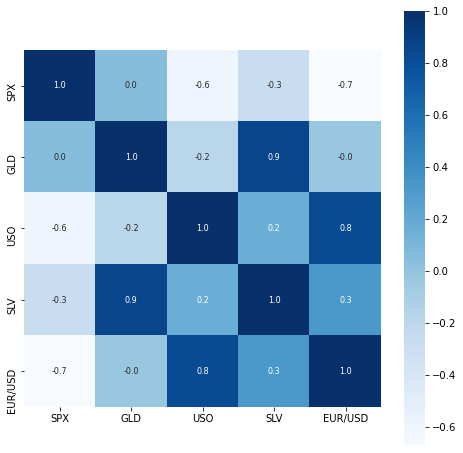

In [9]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

# Correlation values of GLD

In [10]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


# Checking the distribution of the GLD Price

<AxesSubplot:xlabel='GLD', ylabel='Density'>

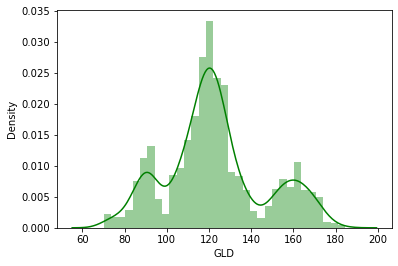

In [11]:
sns.distplot(gold_data['GLD'],color='green')

# Splitting the Features and Target

In [12]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [13]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training data and Test Data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2)

# Fitting linear regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([159.45418744,  81.36647706, 113.47341507, 128.50060572,
       126.12745577, 141.32029457, 165.50879755, 124.36182725,
       113.87938196, 122.91558062, 113.87904354, 174.95424223,
       132.64686836, 159.25357979, 118.81884711, 122.06472047,
       150.38166241, 161.26591291, 152.27223146, 162.21731306,
       145.86304934, 118.03209693, 180.27571608, 178.15530371,
       123.39918646,  98.86992773,  76.54513324, 119.33651653,
       113.79540713, 159.26674329,  93.82933672, 119.95753559,
        88.42239002, 114.26627059, 112.80395948, 144.20720365,
       118.71880679, 115.83286615, 144.07082067, 113.76079787,
       100.52711017,  89.2564381 , 120.26625212, 110.50178206,
       146.49200536, 119.25602002, 110.97351498, 111.30022589,
        96.34626168, 123.32770175,  79.54257322, 115.29285939,
       121.73976159, 114.50634739, 120.82677882, 117.07140437,
       152.30066376, 182.80740675, 196.74240277,  90.92250411,
       101.8092917 ,  87.30570094,  94.40999581, 119.06

In [17]:
from sklearn.metrics import r2_score,mean_absolute_error

# R squared error

In [18]:
print(f"Accuracy : {r2_score(y_test,y_pred)}")

Accuracy : 0.8742729610724103


In [19]:
print("Train accuracy:",lr.score(x_train,y_train))
print("Test accuracy:",lr.score(x_test,y_test))

Train accuracy: 0.8839736611006759
Test accuracy: 0.8742729610724103


# Fitting random forest regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
y_pred

array([168.99769965,  81.90959987, 116.2964004 , 127.30040089,
       120.55190178, 154.67919825, 150.45350042, 126.28780024,
       117.87569885, 126.10730065, 116.3155009 , 172.11590075,
       142.26489888, 167.585899  , 115.11589983, 117.41400048,
       137.95500321, 170.50420108, 159.76480365, 161.77999963,
       155.09040001, 125.82530004, 175.39149977, 156.92100312,
       125.09640089,  93.62359901,  76.06990036, 120.47320012,
       119.32050041, 167.32060062,  88.34619901, 125.61540145,
        91.2009009 , 117.80780002, 121.04829937, 136.47990089,
       115.45320137, 116.54810092, 148.16129946, 107.35230095,
       103.99270177,  87.23149785, 126.62550031, 117.64949907,
       154.44709919, 119.98659999, 108.29480104, 108.14609806,
        93.15049959, 127.39999708,  75.01540043, 113.64529935,
       121.29929998, 111.07359896, 118.95519873, 120.1771    ,
       157.63090067, 167.02730255, 146.90699675,  86.13959978,
        94.28619999,  86.85379879,  90.49299997, 118.82

In [22]:
print(f"Accuracy : {r2_score(y_test,y_pred)}")

Accuracy : 0.9894346482730472


# plotting values of actual prices, versus the predicted prices

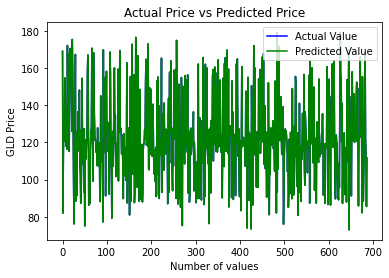

In [23]:
plt.plot(y_pred, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()


# Conclusion :- 

    
By above analysis done, we can conclude that,

Out of two regression algorithm RandomForestRegressor is giving more accuracy as compare to linear regression model.

RandomForestRegressor is giving accuracy 98% which  is an excellent score.

# Result :- 


  Thus we can observe, that the actual prices and the predicted prices are almost the same, as the two graphs overlap each other. Thus, or model has performed extremely well.
  
   
